In [1]:
# Intractive notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
#pd.set_option("display.max_columns",50)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder 
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
from sklearn.metrics import accuracy_score,auc,recall_score,precision_score,precision_recall_curve,confusion_matrix,\
plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve,classification_report,roc_auc_score,f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,KFold,RandomizedSearchCV,StratifiedKFold
from xgboost import XGBClassifier

In [2]:
train_data= pd.read_csv("HR_ANALYTICS_PROMOTION_TRAIN.csv")

In [3]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train_data.shape

(54808, 14)

In [5]:
train_data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [6]:
train_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [7]:
test_data= pd.read_csv("HR_ANALYTICS_PROMOTION_TEST.csv")

In [8]:
test_data.shape

(23490, 13)

In [9]:
test_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

# <CENTER><B> EDA </CENTER></B>

<b><center>BASIC SUMMARY OF DATA </center></b>

In [10]:
def data_info(df=train_data):
    df_info = pd.DataFrame(df.isna().sum(),columns = ['Null_count'])
    df_info['Non_Null_count'] = df_info.index.map(df.notna().sum())
    df_info['N_unique'] = df_info.index.map(df.nunique())
    df_info['D_types'] = df_info.index.map(df.dtypes)
    df_info['Blank_count'] = df_info.index.map((df=='').sum())
    return df_info

<b> TRAIN DATA </b>

In [11]:
data_info(train_data)
#there are 2 variables(education and previous year rating) with null count,no variable having blank count in train data

,Null_count,Non_Null_count,N_unique,D_types,Blank_count
employee_id,0,54808,54808,int64,0
department,0,54808,9,object,0
region,0,54808,34,object,0
education,2409,52399,3,object,0
gender,0,54808,2,object,0
recruitment_channel,0,54808,3,object,0
no_of_trainings,0,54808,10,int64,0
age,0,54808,41,int64,0
previous_year_rating,4124,50684,5,float64,0
length_of_service,0,54808,35,int64,0


In [12]:
train_data['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

In [13]:
train_data['awards_won?'].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

In [14]:
train_data['KPIs_met >80%'].value_counts()

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

In [15]:
train_data['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [16]:
#converting numeric variables to categorical which have only less than 10 classes
train_data["previous_year_rating"]=train_data["previous_year_rating"].astype(object)
train_data["KPIs_met >80%"]=train_data["KPIs_met >80%"].astype(object)
train_data["awards_won?"]=train_data["awards_won?"].astype(object)
train_data["no_of_trainings"]=train_data["no_of_trainings"].astype(object)

<b> TEST DATA </b>

In [17]:
data_info(test_data)
#there are 2 variables(education and previous year rating) with null count,no variable having blank count in test data

,Null_count,Non_Null_count,N_unique,D_types,Blank_count
employee_id,0,23490,23490,int64,0
department,0,23490,9,object,0
region,0,23490,34,object,0
education,1034,22456,3,object,0
gender,0,23490,2,object,0
recruitment_channel,0,23490,3,object,0
no_of_trainings,0,23490,9,int64,0
age,0,23490,41,int64,0
previous_year_rating,1812,21678,5,float64,0
length_of_service,0,23490,34,int64,0


In [18]:
#converting numeric variables to categorical which have only less than 10 classes
test_data["previous_year_rating"]=test_data["previous_year_rating"].astype(object)
test_data["KPIs_met >80%"]=test_data["KPIs_met >80%"].astype(object)
test_data["awards_won?"]=test_data["awards_won?"].astype(object)
test_data["no_of_trainings"]=test_data["no_of_trainings"].astype(object)

<b><center> CHECKING THE EVENT RATE</b></center>

In [19]:
# to check that the classes are balanced or not(checking the event rate)
from collections import Counter
Counter(train_data.is_promoted)
train_data.is_promoted.value_counts(normalize=True)

Counter({0: 50140, 1: 4668})

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

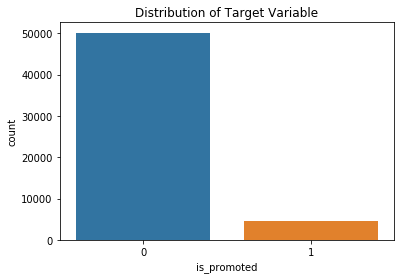

In [20]:
sns.countplot(train_data['is_promoted']);
plt.title("Distribution of Target Variable");

<center><b> TREATING THE NULL VALUES </center></b>

<B> TRAIN DATA </B>

In [21]:
train_data.isna().sum()[train_data.isna().sum()>0]

education               2409
previous_year_rating    4124
dtype: int64

In [22]:
var = 'education'
train_data[var].value_counts(dropna = False,normalize = True)
pd.crosstab(index = train_data[var].fillna('Nan'), columns = train_data.is_promoted,margins = True,normalize='index',)

Bachelor's          0.669045
Master's & above    0.272314
NaN                 0.043953
Below Secondary     0.014688
Name: education, dtype: float64

is_promoted,0,1
education,,
Bachelor's,0.917969,0.082031
Below Secondary,0.916770,0.083230
Master's & above,0.901441,0.098559
Nan,0.949357,0.050643
All,0.914830,0.085170


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Bar plot of education Variable')

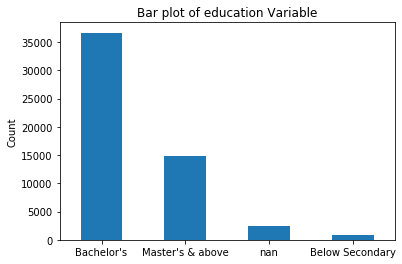

In [23]:
train_data['education'].value_counts(dropna=False).sort_values(ascending=False).plot(kind='bar');
plt.xticks(rotation=360);
plt.ylabel("Count");
plt.title("Bar plot of education Variable")

In [24]:
#Only 4% null values are there in education column so we will impute them by mode
train_data['education'].fillna(train_data['education'].mode()[0],inplace=True)

In [25]:
var = 'previous_year_rating'
train_data[var].value_counts(dropna = False,normalize = True)
pd.crosstab(index = train_data[var].fillna('Nan'), columns = train_data.is_promoted,margins = True,normalize='index',)

3.0    0.339695
5.0    0.214221
4.0    0.180211
1.0    0.113542
2.0    0.077087
NaN    0.075244
Name: previous_year_rating, dtype: float64

is_promoted,0,1
previous_year_rating,,
1.0,0.985859,0.014141
2.0,0.957160,0.042840
3.0,0.927221,0.072779
4.0,0.920624,0.079376
5.0,0.836385,0.163615
Nan,0.917798,0.082202
All,0.914830,0.085170


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Bar plot of previous_year_rating Variable')

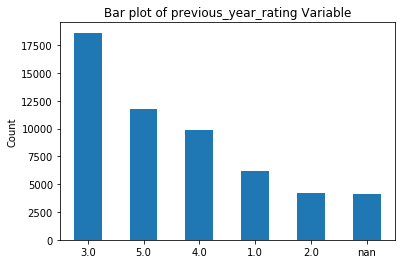

In [26]:
train_data['previous_year_rating'].value_counts(dropna=False).sort_values(ascending=False).plot(kind='bar');
plt.xticks(rotation=360);
plt.ylabel("Count");
plt.title("Bar plot of previous_year_rating Variable")

In [27]:
#Generally we impute when null values are less then 5% but still its closer to 7% so Iam imputing them as unrated
# replacing na values in previous_year_rating with unrated
train_data["previous_year_rating"].fillna("unrated", inplace = True) 
  

In [28]:
#to check any null values still left
train_data.isna().sum()[train_data.isna().sum()>0]

Series([], dtype: int64)

<B> TEST DATA </B>

In [29]:
test_data.isna().sum()[test_data.isna().sum()>0]

education               1034
previous_year_rating    1812
dtype: int64

In [30]:
#We generally impute the test data by the train data values
test_data['education'].fillna(train_data['education'].mode()[0],inplace=True)
# replacing na values in previous_year_rating with unrated
test_data["previous_year_rating"].fillna("unrated", inplace = True) 

In [31]:
#to check any null values in test set
test_data.isna().sum()[test_data.isna().sum()>0]

Series([], dtype: int64)

<center><b> PREPARING TWO LISTS OF NUMERICAL AND CATEGORICAL VARIABLES SEPARATELY</center></b>

In [32]:
target = 'is_promoted'
obj_cols = train_data.head().select_dtypes('O').columns # O means object
obj_cols = [i for  i in obj_cols if i not in [target,'employee_id']] # removing target and employee id from obj columns as they are not vars
obj_cols
num_cols = train_data.head().select_dtypes('number').columns # number will contain float and int
num_cols= [i for  i in num_cols if i not in [target,'employee_id']] # removing target and employee id from num columns as they are not vars
num_cols

['department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'previous_year_rating',
 'KPIs_met >80%',
 'awards_won?']

['age', 'length_of_service', 'avg_training_score']

<center><b> BAR GRAPHS FOR CATEGORICAL VARIABLES </center></b>

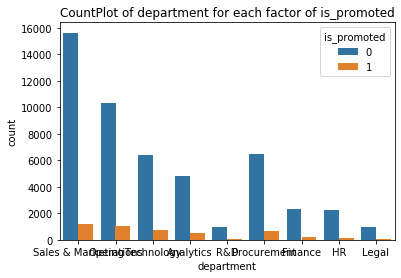

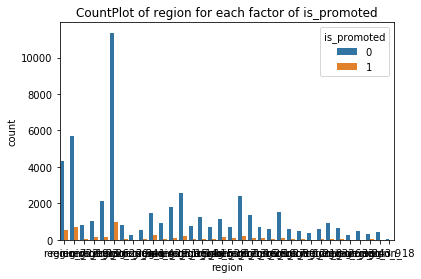

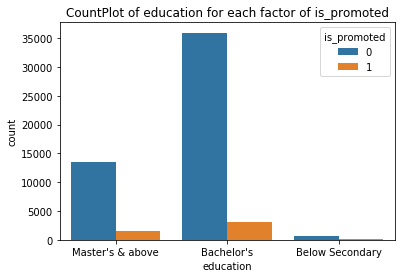

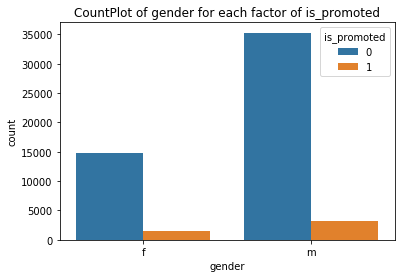

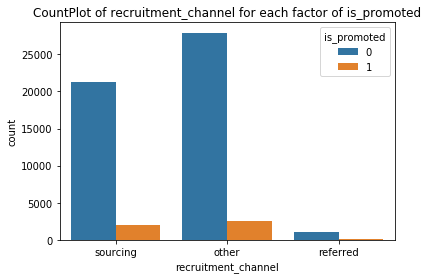

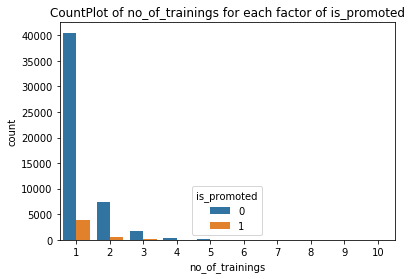

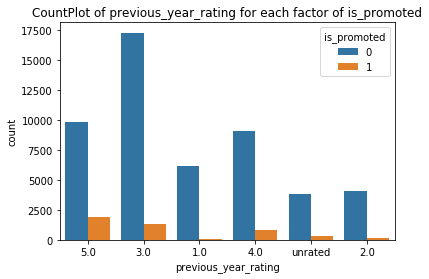

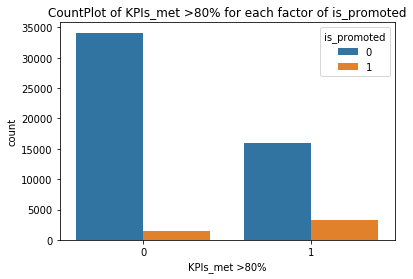

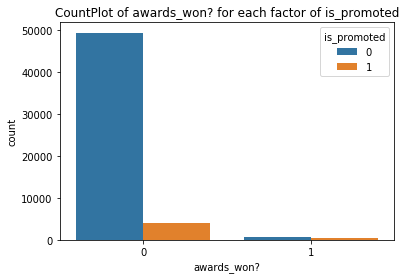

In [33]:
#BAR GRAPHS
for i in obj_cols:
    pfig = plt.figure();
    img = sns.countplot(x= i ,hue= target, data=train_data).set_title(f'CountPlot of {i} for each factor of {target}');
    fig = img.get_figure();

<center><b> PAIR PLOTS FOR NUMERICAL VARIABLE </center></b>

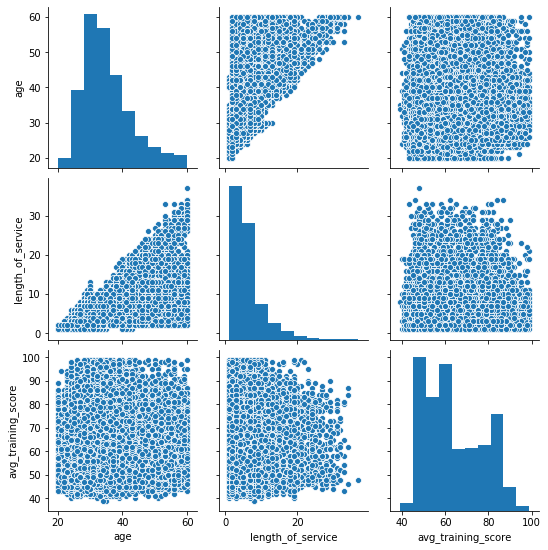

In [34]:
#PAIR PLOTS
sns.pairplot(train_data[num_cols]);

<center><b> CORELATION MATRIX FOR NUMERICAL VARIABLE </CENTER></B>

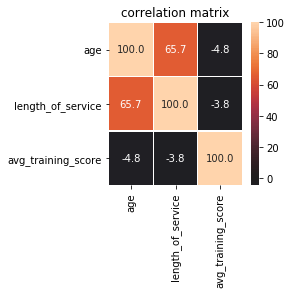

In [35]:
#CORELATION MATRIX
cor_mat = train_data[num_cols].corr()
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
fig, ax = plt.subplots(figsize=(3,3)) ;
x = sns.heatmap(100*cor_mat, annot=True,fmt='.1f',center=0,linewidths = 0.25).set_title('correlation matrix')
plt.show()
#age and length of service are corelated as 65%

<center><b>Checking vars with high(0.65) correlation coeff</b></center>

In [36]:
var1 = []; var2 = []
for i in range(len(cor_mat.columns)):
    for j in range(len(cor_mat.index)):
        if (cor_mat.iloc[i,j] > 0.65) & (i>j):
            var1.append(cor_mat.columns[i]); var2.append(cor_mat.index[j])
high_cor_var = list(zip(var1,var2))
high_cor_var[0][0],high_cor_var[0][1]

('length_of_service', 'age')

<center><b> Removing features with high correlation</center></b>

In [37]:
features_cor=list(num_cols) + list(obj_cols)
features1 = [a for a in features_cor if a not in [a for a,b in high_cor_var]] # removing var1
features1

['age',
 'avg_training_score',
 'department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'previous_year_rating',
 'KPIs_met >80%',
 'awards_won?']

<center><b> BOX PLOTS FOR NUMERICAL VARIABLE </center></b>

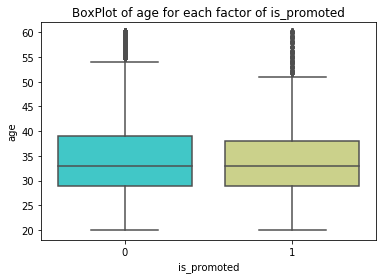

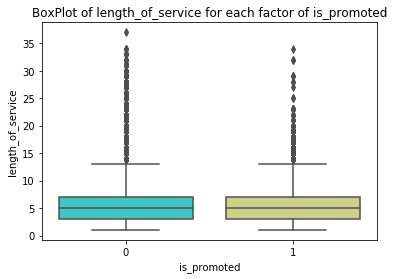

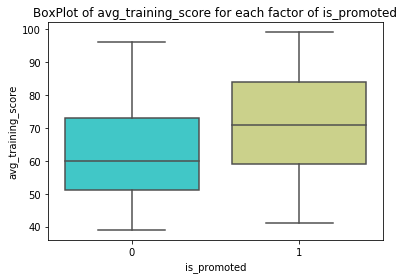

In [38]:
#BOX PLOTS FOR EACH VARIABLE
for i in num_cols:
    pfig = plt.figure();
    img = sns.boxplot(x=target,y=i,data=train_data,palette='rainbow').set_title(f'BoxPlot of {i} for each factor of {target}');
    fig = img.get_figure();

<center><b>ONE HOT ENCODING </CENTER></B>

In [39]:
dvec = DictVectorizer(sparse=False)
train_dvec = dvec.fit_transform(train_data[features1].transpose().to_dict().values()) #train_data[list(num_cols) +list(obj_cols)]
train = pd.DataFrame(train_dvec, index = train_data.index, columns = dvec.get_feature_names())

In [40]:
features=train.columns
features

Index(['KPIs_met >80%', 'age', 'avg_training_score', 'awards_won?',
       'department=Analytics', 'department=Finance', 'department=HR',
       'department=Legal', 'department=Operations', 'department=Procurement',
       'department=R&D', 'department=Sales & Marketing',
       'department=Technology', 'education=Bachelor's',
       'education=Below Secondary', 'education=Master's & above', 'gender=f',
       'gender=m', 'no_of_trainings', 'previous_year_rating',
       'previous_year_rating=unrated', 'recruitment_channel=other',
       'recruitment_channel=referred', 'recruitment_channel=sourcing',
       'region=region_1', 'region=region_10', 'region=region_11',
       'region=region_12', 'region=region_13', 'region=region_14',
       'region=region_15', 'region=region_16', 'region=region_17',
       'region=region_18', 'region=region_19', 'region=region_2',
       'region=region_20', 'region=region_21', 'region=region_22',
       'region=region_23', 'region=region_24', 'region=regi

In [41]:
test_dvec = dvec.transform(test_data[features1].transpose().to_dict().values())
test = pd.DataFrame(test_dvec, index = test_data.index, columns = dvec.get_feature_names())

# <center><b> MODELLING </center></b>

<center><b> EVALUATION METRIC FOR THIS COMPETITION IS F1 SCORE </center></b>

In [42]:
X_train, X_test, y_train, y_test = train_test_split(train[features],train_data.is_promoted,test_size = 0.25,\
                                                    random_state =61, stratify = train_data.is_promoted)

In [43]:
X_train.shape, X_test.shape

((41106, 58), (13702, 58))

In [44]:
y_train.value_counts(normalize = True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

In [45]:
train_data.shape

(54808, 14)

In [46]:
train.columns

Index(['KPIs_met >80%', 'age', 'avg_training_score', 'awards_won?',
       'department=Analytics', 'department=Finance', 'department=HR',
       'department=Legal', 'department=Operations', 'department=Procurement',
       'department=R&D', 'department=Sales & Marketing',
       'department=Technology', 'education=Bachelor's',
       'education=Below Secondary', 'education=Master's & above', 'gender=f',
       'gender=m', 'no_of_trainings', 'previous_year_rating',
       'previous_year_rating=unrated', 'recruitment_channel=other',
       'recruitment_channel=referred', 'recruitment_channel=sourcing',
       'region=region_1', 'region=region_10', 'region=region_11',
       'region=region_12', 'region=region_13', 'region=region_14',
       'region=region_15', 'region=region_16', 'region=region_17',
       'region=region_18', 'region=region_19', 'region=region_2',
       'region=region_20', 'region=region_21', 'region=region_22',
       'region=region_23', 'region=region_24', 'region=regi

# <center><b> LOGISTIC REGRESSION </center></b>

In [47]:
scl = StandardScaler()
logreg = LogisticRegression()

In [48]:
features_lr = features

In [49]:
from sklearn.pipeline import make_pipeline,Pipeline
pipe = Pipeline([('sc', scl), ('lr', logreg)])
#pipe[0]
#pipe[1]

In [50]:
pipe.fit(X_train[features_lr], y_train)

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [51]:
estimator= pipe
pred_bin_tr = estimator.predict(X_train[features_lr])
pred_bin_te = estimator.predict(X_test[features_lr])
#confusion_matrix(y_train,pred_bin_tr)
f'train_roca : {roc_auc_score(y_train,estimator.predict_proba(X_train[features_lr])[:,1])} ; \
test_roca : {roc_auc_score(y_test,estimator.predict_proba(X_test[features_lr])[:,1])}'
f'train_f1_s : {f1_score(y_train,pred_bin_tr)} ; test_f1_s : {f1_score(y_test,pred_bin_te)}'
f'train_prec : {precision_score(y_train,pred_bin_tr)} ; test_prec : {precision_score(y_test,pred_bin_te)}'
f'train_reca : {recall_score(y_train,pred_bin_tr)} ; test_reca : {recall_score(y_test,pred_bin_te)}'
f'train_accu : {accuracy_score(y_train,pred_bin_tr)} ; test_accu : {accuracy_score(y_test,pred_bin_te)}'
f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'

'train_roca : 0.8725944049036307 ; test_roca : 0.8805117735464949'

'train_f1_s : 0.3905607274301797 ; test_f1_s : 0.4119138149556401'

'train_prec : 0.8067978533094812 ; test_prec : 0.7907542579075426'

'train_reca : 0.25764067409311625 ; test_reca : 0.27849185946872324'

'train_accu : 0.931518513112441 ; test_accu : 0.9322726609254124'

'train_conf : [[37389   216]\n [ 2599   902]] ; test_conf : [[12449    86]\n [  842   325]]'

<center><b> F1 SCORE IS 41.19 </CENTER></B>

In [52]:
def logreg_coef(model,data):    
    """
    Gives the intercepts and coefficients along with variable names for logistic regression.
    model : name of the logistic model
    data :  data on which logistic model was fit, column order must be same as that of the
            data on which model was fit
    """
    intercept = pd.DataFrame({'variable' : 'intercept', 'coefficient' : model.intercept_})
    coefficient = pd.DataFrame({'variable' : data.columns, 'coefficient' : model.coef_.transpose().flatten()})
    coefficient = coefficient.reindex(coefficient.coefficient.abs().sort_values(ascending = False).index)
    return(pd.concat([intercept,coefficient], axis = 0).reset_index(drop = True))

In [53]:
#to check the important features
print(logreg_coef(pipe[1],X_train))

                        variable  coefficient
0                      intercept    -3.277927
1             avg_training_score     3.986526
2   department=Sales & Marketing     1.943375
3           department=Analytics    -1.742633
4          department=Technology    -1.421779
5                  KPIs_met >80%     0.874280
6                 department=R&D    -0.868391
7                  department=HR     0.763953
8         department=Procurement    -0.532411
9          department=Operations     0.455991
10          previous_year_rating     0.411501
11  previous_year_rating=unrated     0.263631
12                   awards_won?     0.208581
13            department=Finance     0.194284
14              region=region_22     0.126265
15                           age    -0.120383
16              region=region_18    -0.113885
17              department=Legal     0.106659
18               region=region_9    -0.099701
19               region=region_4     0.097748
20              region=region_34  

<center><b> SELECTIVE LOGREG </CENTER></B>

In [54]:
scl_s = StandardScaler()
logreg_s = LogisticRegression()

In [55]:
#taking top 15 features with 5% importance
features_lr1 = ['avg_training_score','department=Sales & Marketing','department=Analytics',
                'department=Technology','KPIs_met >80%','department=R&D',
                'department=HR','department=Procurement','department=Operations','previous_year_rating',
                'previous_year_rating=unrated','awards_won?','department=Finance','region=region_22',
                'age','region=region_18','department=Legal','region=region_9',
                'region=region_4','region=region_34','no_of_trainings','region=region_29',
                'region=region_7','region=region_31','region=region_11','region=region_32','region=region_20','region=region_25','region=region_17']

In [56]:
pipe = Pipeline([('sc', scl_s), ('lr', logreg_s)])
#pipe[0]
#pipe[1]

In [57]:
pipe.fit(X_train[features_lr1], y_train)

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [58]:
estimator= pipe
pred_bin_tr = estimator.predict(X_train[features_lr1])
pred_bin_te = estimator.predict(X_test[features_lr1])
#confusion_matrix(y_train,pred_bin_tr)
f'train_roca : {roc_auc_score(y_train,estimator.predict_proba(X_train[features_lr1])[:,1])} ; \
test_roca : {roc_auc_score(y_test,estimator.predict_proba(X_test[features_lr1])[:,1])}'
f'train_f1_s : {f1_score(y_train,pred_bin_tr)} ; test_f1_s : {f1_score(y_test,pred_bin_te)}'
f'train_prec : {precision_score(y_train,pred_bin_tr)} ; test_prec : {precision_score(y_test,pred_bin_te)}'
f'train_reca : {recall_score(y_train,pred_bin_tr)} ; test_reca : {recall_score(y_test,pred_bin_te)}'
f'train_accu : {accuracy_score(y_train,pred_bin_tr)} ; test_accu : {accuracy_score(y_test,pred_bin_te)}'
f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'

'train_roca : 0.8710580839231414 ; test_roca : 0.8796851933694481'

'train_f1_s : 0.3929656969170647 ; test_f1_s : 0.4137055837563452'

'train_prec : 0.8190045248868778 ; test_prec : 0.7970660146699267'

'train_reca : 0.2584975721222508 ; test_reca : 0.27934875749785776'

'train_accu : 0.931980732739746 ; test_accu : 0.9325645891110786'

'train_conf : [[37405   200]\n [ 2596   905]] ; test_conf : [[12452    83]\n [  841   326]]'

<B> F1 SCORE JUST INCREASED FROM 41.19 TO 41.37</B>

<center><b> GRID SEARCH FOR LOGISTIC REGRESSION </center></b>

In [59]:
# Create logistic regression
logistic = linear_model.LogisticRegression()

In [60]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [61]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [62]:
# Fit grid search
best_model = clf.fit(X_train, y_train)

In [63]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [64]:
scl_s1 = StandardScaler()

In [65]:
pipe = Pipeline([('sc', scl_s), ('blr', best_model)])

In [66]:
pipe.fit(X_train[features_lr1], y_train)

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('blr',
                 GridSearchCV(cv=5, error_score=nan,
                              estimator=LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                         

In [67]:
estimator= pipe
pred_bin_tr = estimator.predict(X_train[features_lr1])
pred_bin_te = estimator.predict(X_test[features_lr1])
#confusion_matrix(y_train,pred_bin_tr)
f'train_roca : {roc_auc_score(y_train,estimator.predict_proba(X_train[features_lr1])[:,1])} ; \
test_roca : {roc_auc_score(y_test,estimator.predict_proba(X_test[features_lr1])[:,1])}'
f'train_f1_s : {f1_score(y_train,pred_bin_tr)} ; test_f1_s : {f1_score(y_test,pred_bin_te)}'
f'train_prec : {precision_score(y_train,pred_bin_tr)} ; test_prec : {precision_score(y_test,pred_bin_te)}'
f'train_reca : {recall_score(y_train,pred_bin_tr)} ; test_reca : {recall_score(y_test,pred_bin_te)}'
f'train_accu : {accuracy_score(y_train,pred_bin_tr)} ; test_accu : {accuracy_score(y_test,pred_bin_te)}'
f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'

'train_roca : 0.8708533216391419 ; test_roca : 0.879557085917785'

'train_f1_s : 0.3943661971830985 ; test_f1_s : 0.4197218710493047'

'train_prec : 0.8168761220825853 ; test_prec : 0.8'

'train_reca : 0.25992573550414166 ; test_reca : 0.28449014567266495'

'train_accu : 0.9320050600885516 ; test_accu : 0.9330024813895782'

'train_conf : [[37401   204]\n [ 2591   910]] ; test_conf : [[12452    83]\n [  835   332]]'

<center><b> F1 SCORE AFTER GRID SEARCH ON LR IS 41.97</B>

<center> <b> XGBOOST </center> </b>

In [68]:
np.arange(0.5,8,1)

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])

In [69]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': np.arange(0.5,1,0.1),
        'colsample_bytree': np.arange(0.5,1,0.1),
        'max_depth': np.arange(3,11,1),
        'n_estimators': np.arange(100,501,50),
        'max_delta_step' : np.arange(1,8,1),
        'bootstrap' : [True, False]
        }

In [70]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [71]:
xgb = XGBClassifier(learning_rate=0.02, objective='binary:logistic',
                    silent=True, n_jobs = -1,random_state = 53)

<b>STRATIFIED K FOLD </b>

In [72]:
skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 1001)

<b>RANDOMISED SEARCH USING STRATIFIED K FOLD</B>

In [73]:
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=20, \
          scoring='f1_macro', n_jobs=-1, cv=skf, verbose=3, random_state=1001 )

In [74]:
%%time
random_search.fit(X_train, y_train);

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 20.2min finished


[15:07:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bootstrap, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Wall time: 21min 13s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=1001, shuffle=True),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_...
                                        'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_delta_step': array([1, 2, 3, 4, 5, 6, 7

In [75]:
estimator= random_search
pred_bin_tr = estimator.predict(X_train)
pred_bin_te = estimator.predict(X_test)
f'train_roca : {roc_auc_score(y_train,estimator.predict_proba(X_train)[:,1])} ; test_roca : {roc_auc_score(y_test,estimator.predict_proba(X_test)[:,1])}'
f'train_f1_s : {f1_score(y_train,pred_bin_tr)} ; test_f1_s : {f1_score(y_test,pred_bin_te)}'
f'train_prec : {precision_score(y_train,pred_bin_tr)} ; test_prec : {precision_score(y_test,pred_bin_te)}'
f'train_reca : {recall_score(y_train,pred_bin_tr)} ; test_reca : {recall_score(y_test,pred_bin_te)}'
f'train_accu : {accuracy_score(y_train,pred_bin_tr)} ; test_accu : {accuracy_score(y_test,pred_bin_te)}'
f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'

'train_roca : 0.94085798268134 ; test_roca : 0.9115820689216723'

'train_f1_s : 0.5121384842727464 ; test_f1_s : 0.5198511166253101'

'train_prec : 0.9813915857605178 ; test_prec : 0.9415730337078652'

'train_reca : 0.3464724364467295 ; test_reca : 0.35904027420736934'

'train_accu : 0.9437794969104267 ; test_accu : 0.9435118960735659'

'train_conf : [[37582    23]\n [ 2288  1213]] ; test_conf : [[12509    26]\n [  748   419]]'

<center><b> F1 SCORE OF XGBOOST IS 51.98 </center></b>